# EXP 1: LANGUAGE heritability subtype from activation maps

##### Subtype:
- Niak preprocessed LANGUAGE task (new scrub method)
- **SPM** from Math and Story trial for both LR and RL runs
- 5 subtype
- **FD_scrubbed_mean regressed out befor building subtypes**

##### Heritability:
- Regress "FD_scrubbed_mean" "Age_in_Yrs" "Gender" as covariate


## Build Pheno file

### Merge behavioral variables with subtypes weights

In [1]:
# Import pandas
import os
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
# Set up the paths to the files we want to work with
path_root = "/home/yassinebha/Drive/HCP"
net_path = os.path.join(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/networks/")
sbt_name_pattern = "sbt_weights_net_{}.csv"
pheno_path = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/spm_language_pheno_scrub_raw_01-Feb-2017.csv")
out_path = os.path.join(path_root,"Solar_heritability/HCP_subtype/")
solar_script = 'fcd_solar_h2r_test.sh'
pheno_save = 'solar_language_spm_pheno.csv'
pedig_save = 'solar_language_spm_pedigre.csv'
solar_out = 'subtype_5_language_EXP2'
solar_cov = '    cov FD_scrubbed_mean Gender'
h2r_out_file = 'h2r_solar_language_spm_EXP2.csv'

In [14]:
# List of network names
net_names = os.listdir(net_path)
net_names

['story', 'math']

In [15]:
# Loop over each network and build weight file
for index, net in enumerate(net_names):
    file_path = os.path.join(net_path, net, sbt_name_pattern.format(net))
    if not os.path.exists(file_path):
        print("Hello, {} does not exist".format(file_path))
    
    tmp_weights = pd.read_csv(file_path)
    # Rename first column
    tmp_weights.rename(columns={" ":"Subject"}, inplace=True)
    tmp_weights.Subject = tmp_weights.Subject.str.strip(" ")
    
    rename_dict = dict()
    for colname in tmp_weights.columns:
        if colname == "Subject":
            continue
        else:
            new_name = "{}_{}".format(net, colname)
            # Get rid of trailing whitespace
            new_name = new_name.strip(" ")
            rename_dict[colname] = new_name

    tmp_weights.rename(columns=rename_dict, inplace=True)
    
    if index==0:
        dataframe = tmp_weights
    else:
        dataframe = pd.merge(dataframe, tmp_weights, on="Subject", how="inner")

In [16]:
dataframe.head()

,Subject,story_sub1,story_sub2,story_sub3,story_sub4,story_sub5,math_sub1,math_sub2,math_sub3,math_sub4,math_sub5
0,HCP100206,0.270,-0.228,0.322,0.151,-0.170,0.153,-0.231,-0.173,0.117,0.244
1,HCP100307,-0.247,0.120,-0.360,-0.060,0.285,-0.406,0.274,-0.166,0.163,-0.016
2,HCP100408,0.087,0.036,0.239,0.070,-0.315,0.286,-0.165,0.330,-0.202,-0.140
3,HCP100610,-0.276,0.157,-0.367,-0.062,0.260,-0.329,0.281,-0.025,0.012,-0.085
4,HCP101006,-0.056,-0.124,-0.110,0.127,0.223,-0.292,0.152,-0.289,0.015,0.315


In [17]:
dataframe.Subject.describe()

count           803
unique          803
top       HCP133827
freq              1
Name: Subject, dtype: object

In [18]:
# Load pheno file
file_weight = dataframe
file_pheno = pd.read_csv(pheno_path)

In [19]:
file_pheno.head()

,Subject,Age_in_Yrs,Twin_Stat,Zygosity,Mother_ID,Father_ID,Handedness,BMI,Gender,ReadEng_Unadj,PicVocab_Unadj,ListSort_Unadj,FD_scrubbed_mean,FD_mean
0,HCP100206,27,NotTwin,NotTwin,56037,85858.0,65,26.64,M,113.5460,119.89140,112.89,0.094210,0.094210
1,HCP100307,27,Twin,NotMZ,51488,81352.0,95,22.96,F,111.0700,107.20000,108.06,0.110650,0.110650
2,HCP100408,33,Twin,MZ,51730,81594.0,55,27.75,M,131.8100,134.24000,108.06,0.134142,0.134142
3,HCP100610,27,Twin,NotMZ,52813,82634.0,85,36.91,M,141.3166,140.81510,117.39,0.184238,0.184238
4,HCP101006,35,Twin,MZ,51283,81149.0,90,30.27,F,113.5374,95.42348,93.90,0.144401,0.144401


In [20]:
file_pheno.Subject.describe()

count           803
unique          803
top       HCP133827
freq              1
Name: Subject, dtype: object

In [21]:
# Select a subset of variable
file_pheno_subset = file_pheno[["Subject","Age_in_Yrs","Handedness","Gender","BMI","FD_mean","FD_scrubbed_mean"]]
file_pheno_subset.head()

,Subject,Age_in_Yrs,Handedness,Gender,BMI,FD_mean,FD_scrubbed_mean
0,HCP100206,27,65,M,26.64,0.094210,0.094210
1,HCP100307,27,95,F,22.96,0.110650,0.110650
2,HCP100408,33,55,M,27.75,0.134142,0.134142
3,HCP100610,27,85,M,36.91,0.184238,0.184238
4,HCP101006,35,90,F,30.27,0.144401,0.144401


In [22]:
# Replace gender M=1 and F=2
file_pheno_subset.Gender.replace({'M':1,'F':2}, inplace=True)
file_pheno_subset.head()

/usr/local/lib/python3.4/dist-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Subject,Age_in_Yrs,Handedness,Gender,BMI,FD_mean,FD_scrubbed_mean
0,HCP100206,27,65,1,26.64,0.094210,0.094210
1,HCP100307,27,95,2,22.96,0.110650,0.110650
2,HCP100408,33,55,1,27.75,0.134142,0.134142
3,HCP100610,27,85,1,36.91,0.184238,0.184238
4,HCP101006,35,90,2,30.27,0.144401,0.144401


In [23]:
file_pheno_subset[["Subject"]].describe()

,Subject
count,803
unique,803
top,HCP133827
freq,1


In [24]:
file_weight[["Subject"]].describe()

,Subject
count,803
unique,803
top,HCP133827
freq,1


In [25]:
# Merge weight with subset of pheno variables
merged_weight_pheno = pd.merge(file_weight, file_pheno_subset, on='Subject', how='left')
# Replace 'Subject' by 'ID'
merged_weight_pheno.rename(columns={'Subject':'ID'},inplace=True)
merged_weight_pheno.head()

,ID,story_sub1,story_sub2,story_sub3,story_sub4,story_sub5,math_sub1,math_sub2,math_sub3,math_sub4,math_sub5,Age_in_Yrs,Handedness,Gender,BMI,FD_mean,FD_scrubbed_mean
0,HCP100206,0.270,-0.228,0.322,0.151,-0.170,0.153,-0.231,-0.173,0.117,0.244,27,65,1,26.64,0.094210,0.094210
1,HCP100307,-0.247,0.120,-0.360,-0.060,0.285,-0.406,0.274,-0.166,0.163,-0.016,27,95,2,22.96,0.110650,0.110650
2,HCP100408,0.087,0.036,0.239,0.070,-0.315,0.286,-0.165,0.330,-0.202,-0.140,33,55,1,27.75,0.134142,0.134142
3,HCP100610,-0.276,0.157,-0.367,-0.062,0.260,-0.329,0.281,-0.025,0.012,-0.085,27,85,1,36.91,0.184238,0.184238
4,HCP101006,-0.056,-0.124,-0.110,0.127,0.223,-0.292,0.152,-0.289,0.015,0.315,35,90,2,30.27,0.144401,0.144401


In [26]:
merged_weight_pheno.ID.describe()

count           803
unique          803
top       HCP133827
freq              1
Name: ID, dtype: object

In [27]:
# Check if there is empty value in BMI
sum(merged_weight_pheno.BMI.isnull())

1

In [28]:
# Save the merged file
merged_weight_pheno.to_csv(os.path.join(out_path,pheno_save), index=False)

## Build trait file

In [29]:
## build trait file
# Remove not neaded traits
list_trait = merged_weight_pheno.columns.tolist()
new_list = [trait for trait in list_trait if trait not in ['ID','Age_in_Yrs','Gender']]
new_list

['story_sub1',
 'story_sub2',
 'story_sub3',
 'story_sub4',
 'story_sub5',
 'math_sub1',
 'math_sub2',
 'math_sub3',
 'math_sub4',
 'math_sub5',
 'Handedness',
 'BMI',
 'FD_mean',
 'FD_scrubbed_mean']

In [30]:
# Save trait file
file_out = open(os.path.join(out_path,"trait_file"), 'w')
for item in new_list:
    file_out.write("%s\n" % item)
file_out.close()

## Build Pedigree file

In [31]:
# Select a subset of variable from pheno file
file_pheno_pedig = file_pheno[["Subject","Twin_Stat","Zygosity","Mother_ID","Gender"]]
file_pheno_pedig.head()

,Subject,Twin_Stat,Zygosity,Mother_ID,Gender
0,HCP100206,NotTwin,NotTwin,56037,M
1,HCP100307,Twin,NotMZ,51488,F
2,HCP100408,Twin,MZ,51730,M
3,HCP100610,Twin,NotMZ,52813,M
4,HCP101006,Twin,MZ,51283,F


In [32]:
file_pheno_pedig.Subject.describe()

count           803
unique          803
top       HCP133827
freq              1
Name: Subject, dtype: object

In [33]:
# Build pedigre : ID , mo, fo, hhID, mztwins,sex
mother_id = ["mo_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
father_id = ["fa_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
household_id = ["hh_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
twin_id = ["pair_{}".format(row.Mother_ID) if row.Zygosity == "MZ" else "" for ind, row in file_pheno_pedig.iterrows()]

In [34]:
# write into new data frame
df_pedig = pd.DataFrame()
df_pedig["ID"] = file_pheno_pedig.Subject
df_pedig["fa"] = father_id
df_pedig["mo"] = mother_id
df_pedig["sex"] = file_pheno_pedig.Gender.replace(to_replace={"M":1, "F":2})
df_pedig["mztwin"] = twin_id
df_pedig["hhID"] = household_id


print("head")
display(df_pedig.head())
print("tail")
display(df_pedig.tail())
df_pedig.count()

head


,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037,mo_56037,1,,hh_56037
1,HCP100307,fa_51488,mo_51488,2,,hh_51488
2,HCP100408,fa_51730,mo_51730,1,pair_51730,hh_51730
3,HCP100610,fa_52813,mo_52813,1,,hh_52813
4,HCP101006,fa_51283,mo_51283,2,pair_51283,hh_51283


tail


,ID,fa,mo,sex,mztwin,hhID
798,HCP992673,fa_56143,mo_56143,2,,hh_56143
799,HCP992774,fa_51345,mo_51345,1,,hh_51345
800,HCP993675,fa_55800,mo_55800,2,,hh_55800
801,HCP994273,fa_52364,mo_52364,1,,hh_52364
802,HCP996782,fa_51541,mo_51541,2,,hh_51541


ID        803
fa        803
mo        803
sex       803
mztwin    803
hhID      803
dtype: int64

In [35]:
# Look for MZ twins missing their co-twin
uniques = list(df_pedig.mztwin.unique())
uniques.pop(0)
twin_counts = [np.sum(df_pedig.mztwin==twin) for twin in uniques]
# for idx, twin in enumerate(uniques):
#     print("{} occurs {} times".format(twin, twin_counts[idx]))

In [36]:
# create a mask that will kepp only MZ twins missing their co-twin
singles = [True if np.sum(df_pedig.mztwin==row.mztwin)==1 else False for ind, row in df_pedig.iterrows()]

In [37]:
# Make a copy of the pedigre to avoid missing up with the original data
copy_df_pedig = df_pedig.copy()

In [38]:
# Select only MZ twins missing their co-twin
df_single_pedig = copy_df_pedig[singles]

# Add "M_" (for missing) to a the single MZ twins
for i, row in df_single_pedig.iterrows():
    df_single_pedig.set_value(i,"ID","M_{}".format(row.ID))
display(df_single_pedig.head())
df_single_pedig.count()

,ID,fa,mo,sex,mztwin,hhID
38,M_HCP110007,fa_54572,mo_54572,2,pair_54572,hh_54572
54,M_HCP114823,fa_52925,mo_52925,2,pair_52925,hh_52925
81,M_HCP122317,fa_51802,mo_51802,1,pair_51802,hh_51802
86,M_HCP123824,fa_56022,mo_56022,1,pair_56022,hh_56022
89,M_HCP124422,fa_51529,mo_51529,2,pair_51529,hh_51529


ID        42
fa        42
mo        42
sex       42
mztwin    42
hhID      42
dtype: int64

In [39]:
# Append pedgree with fake co-twin for the missing one
df_pedig_final = copy_df_pedig.append(df_single_pedig)
df_pedig_final.head()

,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037,mo_56037,1,,hh_56037
1,HCP100307,fa_51488,mo_51488,2,,hh_51488
2,HCP100408,fa_51730,mo_51730,1,pair_51730,hh_51730
3,HCP100610,fa_52813,mo_52813,1,,hh_52813
4,HCP101006,fa_51283,mo_51283,2,pair_51283,hh_51283


In [40]:
df_pedig_final.tail()

,ID,fa,mo,sex,mztwin,hhID
696,M_HCP769064,fa_52803,mo_52803,1,pair_52803,hh_52803
722,M_HCP835657,fa_52137,mo_52137,2,pair_52137,hh_52137
724,M_HCP837964,fa_52875,mo_52875,2,pair_52875,hh_52875
765,M_HCP904044,fa_51290,mo_51290,2,pair_51290,hh_51290
790,M_HCP972566,fa_56077,mo_56077,2,pair_56077,hh_56077


In [42]:
df_pedig_final.count()

ID        845
fa        845
mo        845
sex       845
mztwin    845
hhID      845
dtype: int64

In [43]:
# Save the pedigree file
df_pedig_final.to_csv(os.path.join(out_path,pedig_save), index=False)

In [44]:
import sys

def query_yes_no(question, default="yes"):
    """Ask a yes/no question via input() and return their answer.

    "question" is a string that is presented to the user.
    "default" is the presumed answer if the user just hits <Enter>.
        It must be "yes" (the default), "no" or None (meaning
        an answer is required of the user).

    The "answer" return value is True for "yes" or False for "no".
    """
    valid = {"yes": True, "y": True, "ye": True,
             "no": False, "n": False}
    if default is None:
        prompt = " [y/n] "
    elif default == "yes":
        prompt = " [Y/n] "
    elif default == "no":
        prompt = " [y/N] "
    else:
        raise ValueError("invalid default answer: '%s'" % default)

    while True:
        sys.stdout.write(question + prompt)
        choice = input().lower()
        if default is not None and choice == '':
            return valid[default]
        elif choice in valid:
            return valid[choice]
        else:
            sys.stdout.write("Please respond with 'yes' or 'no' "
                             "(or 'y' or 'n').\n")
    return choice

## Run SOLAR heritability estimate 

In [45]:
query_yes_no('HALT, you are about to run heritability pipline, would you like to continue?')

HALT, you are about to run heritability pipline, would you like to continue? [Y/n] 


True

In [64]:
%%bash -s "$out_path" "$solar_cov" "$solar_script" 
cd $1 #cd to out_path
#sufix=$(echo $2 | sed -e 's/ /_/g') # add a suffix of covariate
sed -i "104s/.*/$2/" $3 # feed the covariate to solar script
sed -i "52s~.*~$1phi2.gz~" $3 # put the right path for the simlink
sed -i "53s~.*~$1pedindex.out~" $3
sed -i "54s~.*~$1pedindex.cde~" $3
sed -i "55s~.*~$1se_univ_polygen.tcl~" $3

In [65]:
%%bash -s "$out_path" "$pedig_save"
cd $1
solar <<INTERNAL_SOLAR_SCRIPT  
load pedi $2
pedigree classes -full
INTERNAL_SOLAR_SCRIPT


SOLAR Eclipse version 8.1.1 (General), last updated on January 12, 2017
Copyright (c) 1995-2017 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Unloading current pedigree data ...
Loading pedigree data from the file solar_language_spm_pedigre.csv ...
::::::::::::::
mibdrel.tab
::::::::::::::

    NPairs  Relationship
  ========  ===========================================
      1579  Self
       118  Identical sib pair
      1690  Parent-offspring
       584  Siblings
       367  Unrelated



In [67]:
%%bash -s "$out_path" "$pheno_save" "$solar_out"
cd $1
#if [ ! -d $3 ]; then
#   mkdir $3
#fi
solar <<INTERNAL_SOLAR_SCRIPT 
load pheno $2
INTERNAL_SOLAR_SCRIPT
bash fcd_solar_h2r_test.sh trait_file $3 $1$2
for i in $3/Set-*; do bash $i/run_all.sh ; done


SOLAR Eclipse version 8.1.1 (General), last updated on January 12, 2017
Copyright (c) 1995-2017 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Error: output location 'subtype_5_language_EXP2' already exists.


## Results

In [3]:
out_herit = pd.read_csv(os.path.join(out_path,solar_out,"se_out.out"),sep="\t",header=None)
out_herit_df =  pd.DataFrame()
data = pd.DataFrame({"Trait": out_herit[2],"H2r": out_herit[4],"P": out_herit[7],"CovVarianceExpl": out_herit[9]})
out_herit_df = data[["Trait","H2r","P","CovVarianceExpl"]].sort_values(['Trait'], ascending=[True]).reset_index(drop=True)
out_herit_df


,Trait,H2r,P,CovVarianceExpl
0,BMI_norm,0.508996,2.068182e-11,0.384841
1,FD_mean_norm,0.303097,1.498000e-04,0.824366
2,FD_scrubbed_mean_norm,0.053358,2.222762e-01,0.960030
3,math_sub1_norm,0.650278,8.232903e-25,0.002409
4,math_sub2_norm,0.647865,2.715053e-23,0.013615
5,math_sub3_norm,0.273120,7.400000e-06,0.003856
6,math_sub4_norm,0.319037,7.300000e-06,0.026060
7,math_sub5_norm,0.339819,1.500000e-06,0.003860
8,story_sub1_norm,0.672267,1.516929e-24,0.001919
9,story_sub2_norm,0.616657,3.218857e-20,0.007615


In [5]:
# FDR
from statsmodels.sandbox.stats import multicomp as smi
pcorr_vec = smi.multipletests(out_herit_df['P'], alpha=0.05, method='fdr_bh')
out_herit_df.insert(3,'FDR',pcorr_vec[1])
out_herit_df.insert(4,'FDR_log10',-np.log10(pcorr_vec[1]))

In [6]:
out_herit_df

,Trait,H2r,P,FDR,FDR_log10,CovVarianceExpl
0,BMI_norm,0.508996,2.068182e-11,4.481062e-11,10.348619,0.384841
1,FD_mean_norm,0.303097,1.498000e-04,1.770364e-04,3.751938,0.824366
2,FD_scrubbed_mean_norm,0.053358,2.222762e-01,2.222762e-01,0.653107,0.960030
3,math_sub1_norm,0.650278,8.232903e-25,9.860036e-24,23.006122,0.002409
4,math_sub2_norm,0.647865,2.715053e-23,8.823922e-23,22.054338,0.013615
5,math_sub3_norm,0.273120,7.400000e-06,9.620000e-06,5.016825,0.003856
6,math_sub4_norm,0.319037,7.300000e-06,9.620000e-06,5.016825,0.026060
7,math_sub5_norm,0.339819,1.500000e-06,2.437500e-06,5.613055,0.003860
8,story_sub1_norm,0.672267,1.516929e-24,9.860036e-24,23.006122,0.001919
9,story_sub2_norm,0.616657,3.218857e-20,8.369029e-20,19.077325,0.007615


In [7]:
out_herit_df_math = out_herit_df[['Trait','H2r']][out_herit_df.Trait.str[0:4] == 'math']
out_herit_df_story = out_herit_df[['Trait','H2r']][out_herit_df.Trait.str[0:5] == 'story']

display(out_herit_df_math)
out_herit_df_story

,Trait,H2r
3,math_sub1_norm,0.650278
4,math_sub2_norm,0.647865
5,math_sub3_norm,0.273120
6,math_sub4_norm,0.319037
7,math_sub5_norm,0.339819


,Trait,H2r
8,story_sub1_norm,0.672267
9,story_sub2_norm,0.616657
10,story_sub3_norm,0.669885
11,story_sub4_norm,0.256162
12,story_sub5_norm,0.334607


In [8]:
# format math
column_net = [row['Trait'].split('_')[0].strip() for ind,row in out_herit_df_math[['Trait']].iterrows()]
out_herit_df_math.loc[:,'Trial'] = column_net
column_subt = [row['Trait'].split('_')[1].strip() for ind,row in out_herit_df_math[['Trait']].iterrows()]
out_herit_df_math.loc[:,'Subt'] = column_subt
out_herit_df_math_select = out_herit_df_math[['Trial','Subt','H2r']]
out_herit_df_math_select

,Trial,Subt,H2r
3,math,sub1,0.650278
4,math,sub2,0.647865
5,math,sub3,0.273120
6,math,sub4,0.319037
7,math,sub5,0.339819


In [9]:
# Format story
column_net = [row['Trait'].split('_')[0].strip() for ind,row in out_herit_df_story[['Trait']].iterrows()]
out_herit_df_story.loc[:,'Trial'] = column_net
column_subt = [row['Trait'].split('_')[1].strip() for ind,row in out_herit_df_story[['Trait']].iterrows()]
out_herit_df_story.loc[:,'Subt'] = column_subt
out_herit_df_story_select = out_herit_df_story[['Trial','Subt','H2r']]
out_herit_df_story_select

,Trial,Subt,H2r
8,story,sub1,0.672267
9,story,sub2,0.616657
10,story,sub3,0.669885
11,story,sub4,0.256162
12,story,sub5,0.334607


In [10]:
# append math and story
out_herit_df_tmp = out_herit_df_math_select.append(out_herit_df_story_select)
out_herit_df_tmp

,Trial,Subt,H2r
3,math,sub1,0.650278
4,math,sub2,0.647865
5,math,sub3,0.273120
6,math,sub4,0.319037
7,math,sub5,0.339819
8,story,sub1,0.672267
9,story,sub2,0.616657
10,story,sub3,0.669885
11,story,sub4,0.256162
12,story,sub5,0.334607


In [11]:
# pivot table
out_herit_df_final = out_herit_df_tmp.pivot(index='Trial',columns='Subt',values='H2r')
out_herit_df_final.index.name=None
out_herit_df_final

Subt,sub1,sub2,sub3,sub4,sub5
math,0.650278,0.647865,0.273120,0.319037,0.339819
story,0.672267,0.616657,0.669885,0.256162,0.334607


In [12]:
# save to csv
out_herit_df_final.to_csv(os.path.join(out_path,solar_out,h2r_out_file))
print(os.path.join(out_path,solar_out,h2r_out_file))

/home/yassinebha/Drive/HCP/Solar_heritability/HCP_subtype/subtype_5_language_EXP2/h2r_solar_language_spm_EXP2.csv


In [7]:
##### switch kernel to R #########

In [1]:
#devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)
MyData <- read.csv(file="/home/yassinebha/Drive/HCP/Solar_heritability/HCP_subtype/subtype_5_language_EXP2/h2r_solar_language_spm_EXP2.csv", header=TRUE, sep=",")

In [2]:
MyData

X,sub1,sub2,sub3,sub4,sub5
math,0.6502776,0.6478650,0.2731202,0.3190375,0.3398195
story,0.6722669,0.6166567,0.6698850,0.2561624,0.3346073


In [4]:
library(ggradar)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

In [5]:
# plot radar 
image=ggradar(MyData)

In [13]:
setwd("/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/networks/")

In [12]:
# first on terminal install cairo : "sudo apt install libcairo2-dev"
# devtools::install_github("hadley/svglite")

In [14]:
ggsave(file="test.svg", plot=image, width=10, height=8)

In [10]:
devtools::install_github("hadley/svglite")

from URL https://api.github.com/repos/hadley/svglite/zipball/master
Installing svglite
Installing gdtools
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmppY4hYW/devtools33287417360f/gdtools'  \
  --library='/home/yassinebha/R/x86_64-pc-linux-gnu-library/3.3'  \
  --install-tests 

'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmppY4hYW/devtools3328758e8604/hadley-svglite-970d67a'  \
  --library='/home/yassinebha/R/x86_64-pc-linux-gnu-library/3.3'  \
  --install-tests 



In [12]:
# other solution
# install.packages('fmsb')
# Library
library(fmsb)
radarchart(MyData)

ERROR: Error in library(fmsb): there is no package called ‘fmsb’


Installing package into ‘/home/yassinebha/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [17]:
# install.packages('fmsb')
# Library
library(fmsb)
 
# Create data: note in High school for Jonathan:
data=as.data.frame(matrix( sample( 2:20 , 10 , replace=T) , ncol=10))
colnames(data)=c("math" , "english" , "biology" , "music" , "R-coding", "data-viz" , "french" , "physic", "statistic", "sport" )
 
# To use the fmsb package, I have to add 2 lines to the dataframe: the max and min of each topic to show on the plot!
data=rbind(rep(20,10) , rep(0,10) , data)
data

math,english,biology,music,R-coding,data-viz,french,physic,statistic,sport
20,20,20,20,20,20,20,20,20,20
0,0,0,0,0,0,0,0,0,0
9,16,11,9,12,9,18,16,18,8


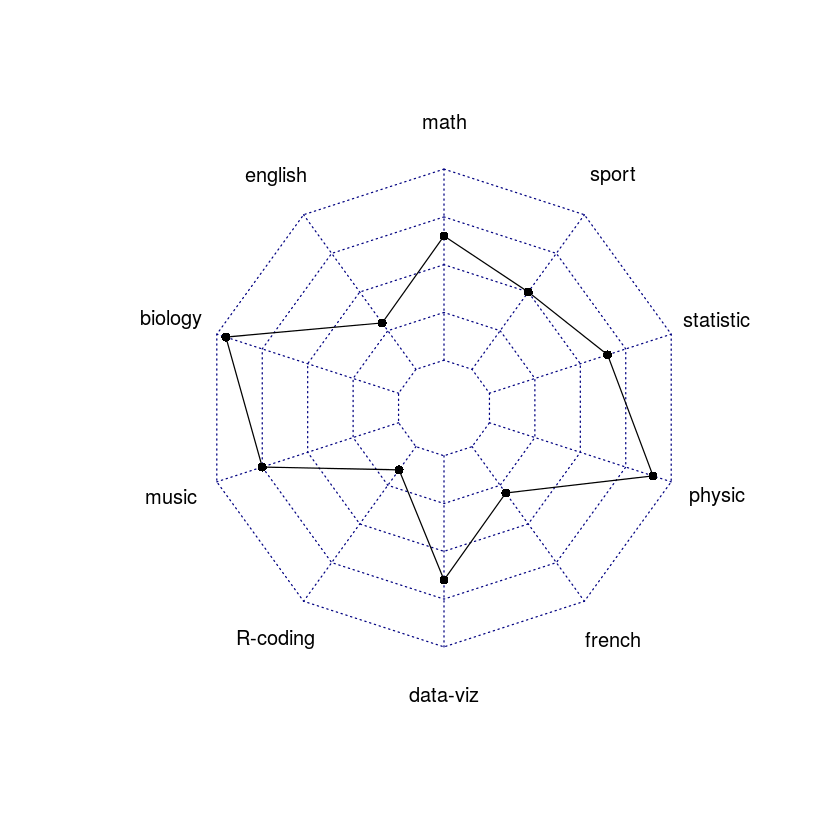

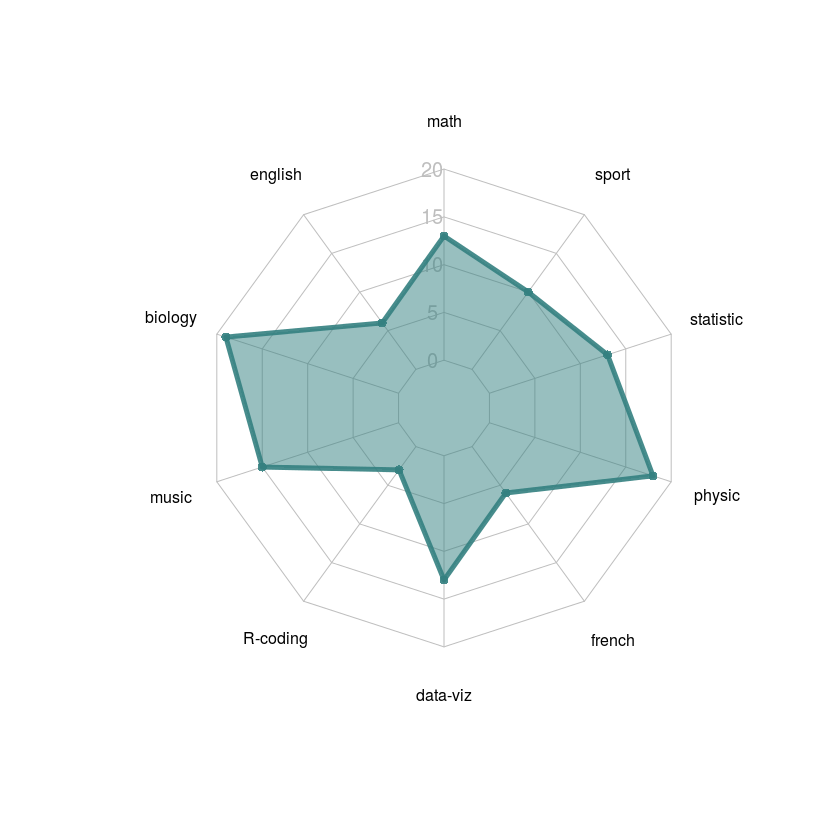

In [11]:
# The default radar chart proposed by the library:
radarchart(data)
 
# Custom the radarChart !
radarchart( data  , axistype=1 , 
 
    #custom polygon
    pcol=rgb(0.2,0.5,0.5,0.9) , pfcol=rgb(0.2,0.5,0.5,0.5) , plwd=4 , 
 
    #custom the grid
    cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,20,5), cglwd=0.8,
 
    #custom labels
    vlcex=0.8 
    )
 

In [12]:
data

math,english,biology,music,R-coding,data-viz,french,physic,statistic,sport
20,20,20,20,20,20,20,20,20,20
0,0,0,0,0,0,0,0,0,0
13,6,19,15,3,13,6,18,13,10


In [14]:
devtools::install_github("timelyportfolio/d3radarR")

library(d3radarR)

from URL https://api.github.com/repos/timelyportfolio/d3radarR/zipball/master
Installing d3radarR
Installing htmltools
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpxVhKai/devtools3e1c5f7b0f17/htmltools'  \
  --library='/home/yassinebha/R/x86_64-pc-linux-gnu-library/3.3'  \
  --install-tests 

Installing htmlwidgets
Installing yaml
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpxVhKai/devtools3e1c2bce06ce/yaml'  \
  --library='/home/yassinebha/R/x86_64-pc-linux-gnu-library/3.3'  \
  --install-tests 

'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpxVhKai/devtools3e1c12d4cc38/htmlwidgets'  \
  --library='/home/yassinebha/R/x86_64-pc-linux-gnu-library/3.3'  \
  --install-tests 

Installing markdown
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpxVhKai/devtools

In [16]:
# use data from demo
#   https://github.com/TennisVisuals/updating-radar-chart/blob/master/radarDemo.js
json_data = jsonlite::fromJSON(
'
  [  
    {  
      "key":"Nokia Smartphone",
      "values":[  
        {  "axis":"Battery Life", "value":0.26 }, {  "axis":"Brand", "value":0.10 },
        {  "axis":"Contract Cost", "value":0.30 }, {  "axis":"Design And Quality", "value":0.14 },
        {  "axis":"Have Internet Connectivity", "value":0.22 }, {  "axis":"Large Screen", "value":0.04 },
        {  "axis":"Price Of Device", "value":0.41 }, {  "axis":"To Be A Smartphone", "value":0.30 }
        ]
    },
    {  
      "key":"Samsung",
      "values":[  
        {  "axis":"Battery Life", "value":0.27 }, {  "axis":"Brand", "value":0.16 },
        {  "axis":"Contract Cost", "value":0.35 }, {  "axis":"Design And Quality", "value":0.13 },
        {  "axis":"Have Internet Connectivity", "value":0.20 }, {  "axis":"Large Screen", "value":0.13 },
        {  "axis":"Price Of Device", "value":0.35 }, {  "axis":"To Be A Smartphone", "value":0.38 }
        ]
    },
    {  
      "key":"iPhone",
      "values":[  
        {  "axis":"Battery Life", "value":0.22 }, {  "axis":"Brand", "value":0.28 },
        {  "axis":"Contract Cost", "value":0.29 }, {  "axis":"Design And Quality", "value":0.17 },
        {  "axis":"Have Internet Connectivity", "value":0.22 }, {  "axis":"Large Screen", "value":0.02 },
        {  "axis":"Price Of Device", "value":0.21 }, {  "axis":"To Be A Smartphone", "value":0.50 }
        ]
    }
  ]
',
  simplifyDataFrame = FALSE
)

d3radar(json_data)

HTML widgets cannot be represented in plain text (need html)

In [21]:
from ipywidgets import interact

[[1]]
[[1]]$key
[1] "Nokia Smartphone"

[[1]]$values
[[1]]$values[[1]]
[[1]]$values[[1]]$axis
[1] "Battery Life"

[[1]]$values[[1]]$value
[1] 0.26


[[1]]$values[[2]]
[[1]]$values[[2]]$axis
[1] "Brand"

[[1]]$values[[2]]$value
[1] 0.1


[[1]]$values[[3]]
[[1]]$values[[3]]$axis
[1] "Contract Cost"

[[1]]$values[[3]]$value
[1] 0.3


[[1]]$values[[4]]
[[1]]$values[[4]]$axis
[1] "Design And Quality"

[[1]]$values[[4]]$value
[1] 0.14


[[1]]$values[[5]]
[[1]]$values[[5]]$axis
[1] "Have Internet Connectivity"

[[1]]$values[[5]]$value
[1] 0.22


[[1]]$values[[6]]
[[1]]$values[[6]]$axis
[1] "Large Screen"

[[1]]$values[[6]]$value
[1] 0.04


[[1]]$values[[7]]
[[1]]$values[[7]]$axis
[1] "Price Of Device"

[[1]]$values[[7]]$value
[1] 0.41


[[1]]$values[[8]]
[[1]]$values[[8]]$axis
[1] "To Be A Smartphone"

[[1]]$values[[8]]$value
[1] 0.3




[[2]]
[[2]]$key
[1] "Samsung"

[[2]]$values
[[2]]$values[[1]]
[[2]]$values[[1]]$axis
[1] "Battery Life"

[[2]]$values[[1]]$value
[1] 0.27


[[2]]$values[[2]]
[[2]]$values[[2]]$axis
[1] "Brand"

[[2]]$values[[2]]$value
[1] 0.16


[[2]]$values[[3]]
[[2]]$values[[3]]$axis
[1] "Contract Cost"

[[2]]$values[[3]]$value
[1] 0.35


[[2]]$values[[4]]
[[2]]$values[[4]]$axis
[1] "Design And Quality"

[[2]]$values[[4]]$value
[1] 0.13


[[2]]$values[[5]]
[[2]]$values[[5]]$axis
[1] "Have Internet Connectivity"

[[2]]$values[[5]]$value
[1] 0.2


[[2]]$values[[6]]
[[2]]$values[[6]]$axis
[1] "Large Screen"

[[2]]$values[[6]]$value
[1] 0.13


[[2]]$values[[7]]
[[2]]$values[[7]]$axis
[1] "Price Of Device"

[[2]]$values[[7]]$value
[1] 0.35


[[2]]$values[[8]]
[[2]]$values[[8]]$axis
[1] "To Be A Smartphone"

[[2]]$values[[8]]$value
[1] 0.38




[[3]]
[[3]]$key
[1] "iPhone"

[[3]]$values
[[3]]$values[[1]]
[[3]]$values[[1]]$axis
[1] "Battery Life"

[[3]]$values[[1]]$value
[1] 0.22


[[3]]$values[[2]]
[[3]]$values[[2]]$axis
[1] "Brand"

[[3]]$values[[2]]$value
[1] 0.28


[[3]]$values[[3]]
[[3]]$values[[3]]$axis
[1] "Contract Cost"

[[3]]$values[[3]]$value
[1] 0.29


[[3]]$values[[4]]
[[3]]$values[[4]]$axis
[1] "Design And Quality"

[[3]]$values[[4]]$value
[1] 0.17


[[3]]$values[[5]]
[[3]]$values[[5]]$axis
[1] "Have Internet Connectivity"

[[3]]$values[[5]]$value
[1] 0.22


[[3]]$values[[6]]
[[3]]$values[[6]]$axis
[1] "Large Screen"

[[3]]$values[[6]]$value
[1] 0.02


[[3]]$values[[7]]
[[3]]$values[[7]]$axis
[1] "Price Of Device"

[[3]]$values[[7]]$value
[1] 0.21


[[3]]$values[[8]]
[[3]]$values[[8]]$axis
[1] "To Be A Smartphone"

[[3]]$values[[8]]$value
[1] 0.5